# Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
import seaborn as sns
import json
import calendar
import statistics
import numpy as np
from pathlib import Path
import os
pd.set_option("display.max_columns", None)

viridisPalette = sns.color_palette("viridis")
magmaPalette = sns.color_palette("magma")

import warnings
warnings.simplefilter("ignore")


### Auxiliary

In [8]:
filePath = os.path.abspath(os.getcwd())
plotsPath = "SuperstorePlots"

#Plots folder
try:
    os.mkdir(f"{filePath}/SuperstorePlots")
except FileExistsError:
    print("SuperstorePlots folder already exists")
    pass


SuperstorePlots folder already exists


In [9]:
spname = "Superstore.csv"

usJsonStates = json.load(open("us-states.json", "r"))

stateCodes = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "District of Columbia":"DC", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA",
    "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT",
    "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM",
    "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"}
#Since Distric of Columbia has been classified differently from the Washington state it will be classified as a different one

alternativeColorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]



# EDA

In [10]:
def readSales(csvFile):

    salesDF = pd.read_csv(csvFile, encoding="ISO 8859-1") #Reading csv file and df creation
    salesDF.dropna() #Getting rid of possbile nulls
    salesDF = salesDF.rename(columns={"Row ID":"RowID", "Order ID":"OrderID", "Order Date":"OrderDate", "Ship Date":"ShipDate", "Ship Mode":"ShipMode", "Customer ID":"CustomerID", "Customer Name":"CustomerName", "Segment":"Segment",
                                      "Country":"Country", "City":"City", "State":"State", "Postal Code":"PostalCode", "Region":"Region", "Product ID":"ProductID", "Category":"Category", "Sub-Category":"SubCategory", "Product Name":"ProductName", "Sales":"Sales",
                                      "Quantity":"Quantity", "Discount":"Discount", "Profit":"Profit"}) #Renaming columns to get rid of spaces

    return salesDF

superstoreDF = readSales(spname)
superstoreDF["StateCode"] = superstoreDF["State"].apply(lambda x: stateCodes.get(x, None))


In [11]:
superstoreDF

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,StateCode
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,KY
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,KY
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,FL
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,22-01-2011,24-01-2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,FL
9990,9991,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,CA
9991,9992,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,CA
9992,9993,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,CA


In [12]:
superstoreDF.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
superstoreDF["OrderDate"] = pd.to_datetime(superstoreDF["OrderDate"], format="%d-%m-%Y")

In [14]:
print("DF Shape:", superstoreDF.shape)

DF Shape: (9994, 22)


In [15]:
superstoreDF["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [16]:
print("Total quantity median: ", np.median(superstoreDF["Quantity"]))
print("Quantity median by state: ")
superstoreDF["Quantity"].groupby(superstoreDF["State"]).median()

Total quantity median:  3.0
Quantity median by state: 


State
Alabama                 3.0
Arizona                 3.0
Arkansas                4.0
California              3.0
Colorado                3.0
Connecticut             3.0
Delaware                3.0
District of Columbia    3.0
Florida                 3.0
Georgia                 3.0
Idaho                   3.0
Illinois                3.0
Indiana                 3.0
Iowa                    3.0
Kansas                  2.5
Kentucky                3.0
Louisiana               3.0
Maine                   2.0
Maryland                3.0
Massachusetts           3.0
Michigan                3.0
Minnesota               3.0
Mississippi             4.0
Missouri                3.0
Montana                 3.0
Nebraska                3.0
Nevada                  4.0
New Hampshire           4.0
New Jersey              3.0
New Mexico              3.0
New York                3.0
North Carolina          3.0
North Dakota            4.0
Ohio                    3.0
Oklahoma                3.0
Oregon        

##### Finding states with very a very small number of orders

In [17]:
superstoreDF.groupby("State", as_index=False)["RowID"].count()

,State,RowID
0,Alabama,61
1,Arizona,224
2,Arkansas,60
3,California,2001
4,Colorado,182
5,Connecticut,82
6,Delaware,96
7,District of Columbia,10
8,Florida,383
9,Georgia,184


In [18]:
print(f'Years available in the dataset: {superstoreDF["OrderDate"].dt.year.unique()}')

Years available in the dataset: [2013 2012 2011 2014]


In [19]:
superstoreDF.isna().sum()

RowID           0
OrderID         0
OrderDate       0
ShipDate        0
ShipMode        0
CustomerID      0
CustomerName    0
Segment         0
Country         0
City            0
State           0
PostalCode      0
Region          0
ProductID       0
Category        0
SubCategory     0
ProductName     0
Sales           0
Quantity        0
Discount        0
Profit          0
StateCode       0
dtype: int64

# Data Cleaning

In [20]:
superstoreDF = superstoreDF.dropna()

In [21]:
statesToRemove = ["Wyoming", "West Virginia", "Wyoming", "Vermont", "South Dakota", "North Dakota", "Montana", "Maine", "District of Columbia"]
superstoreDF = superstoreDF[~superstoreDF["State"].isin(statesToRemove)] #Dropping rows with states that have a very small number of orders to avoid them to be relevant in the analysis given their poor importance in the analysis
superstoreDF.shape

(9926, 22)

In [22]:
superstoreDF["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'New Hampshire', 'Maryland', 'Kansas',
       'Idaho'], dtype=object)

In [23]:
superstoreDF["OrderDate"] = pd.to_datetime(superstoreDF["OrderDate"], format='%d-%m-%Y')

In [24]:
superstoreDF = superstoreDF.drop_duplicates()

## Auxiliary Functions

### Z-Score

In [25]:
def ZScore(df) -> pd.DataFrame:
    df["ZScore"] = (df["Sales"] - df["Sales"].mean())/df["Sales"].std() 
    cleanDF = df[(df["ZScore"] > -3) & (df["ZScore"] < 3)] #Filtering all the records that have on the "Sales" column a z score greater than 3 (which is the tipical range between 99.7% of the data falls in the Gaussian distribution)
    cleanDF = cleanDF.drop(columns="ZScore")
    print(cleanDF["Sales"].describe())

    return cleanDF

# Plots and More

### Median Expense by State

In [26]:
StatesMedianSalesDF = superstoreDF.groupby("StateCode", as_index=False)["Sales"].median()
StatesMedianSalesDF = StatesMedianSalesDF.sort_values(by=["Sales"])

print(StatesMedianSalesDF)

fig = px.choropleth(StatesMedianSalesDF, locations="StateCode", locationmode='USA-states', geojson=usJsonStates, color="Sales", scope="usa", color_continuous_scale=alternativeColorscale, labels={'Sales':'Expense in US Dollars ($)'})
fig.update_layout(title=dict(text="Median Expense by State", font=dict(size=25), x=0.5))
fig.update_traces(marker_line_width=1, marker_opacity=1)
fig.update_geos(showsubunits=True, subunitcolor="#57a0ce", subunitwidth=3)
fig.write_html(f"./{plotsPath}/MedianExpenseByState.html")
fig.show()


   StateCode   Sales
9         IA  33.465
23        NE  34.200
36        TX  36.288
11        IL  36.568
32        PA  41.472
7         FL  41.472
35        TN  42.048
29        OH  44.376
22        NC  45.216
26        NM  45.360
31        OR  46.596
5         CT  50.000
19        MN  50.400
4         CO  51.016
1         AR  54.420
20        MO  57.685
28        NY  60.045
37        UT  60.120
3         CA  61.020
2         AZ  61.512
16        MA  63.200
13        KS  63.980
15        LA  64.140
38        VA  65.250
39        WA  65.940
25        NJ  66.730
6         DE  67.005
24        NH  68.620
34        SC  69.970
12        IN  70.080
8         GA  70.955
0         AL  70.980
33        RI  71.200
14        KY  76.300
21        MS  77.560
27        NV  79.140
30        OK  79.550
18        MI  85.520
17        MD  89.820
10        ID  89.970
40        WI  93.860


### Number of Orders by State

In [27]:

OrdersDF = superstoreDF.groupby("StateCode", as_index=False)["Sales"].count()
OrdersDF = OrdersDF.sort_values(by=["Sales"], ascending=False)

print(OrdersDF)
print(OrdersDF["Sales"].sum())

fig = px.choropleth(OrdersDF, locations="StateCode", locationmode='USA-states', geojson=usJsonStates, color="Sales", scope="usa", color_continuous_scale="Mint", labels={'Sales':'Number of Orders'})
fig.update_layout(title=dict(text="Total Number of Orders by State", font=dict(size=25), x=0.5))
fig.update_traces(marker_line_width=1, marker_opacity=1)
fig.update_geos(showsubunits=True, subunitcolor="#3EB489", subunitwidth=3)
fig.write_html(f"./{plotsPath}/OrdersByState.html")
fig.show()



   StateCode  Sales
3         CA   2001
28        NY   1128
36        TX    985
32        PA    587
39        WA    506
11        IL    492
29        OH    469
7         FL    383
18        MI    255
22        NC    249
38        VA    224
2         AZ    224
8         GA    184
35        TN    183
4         CO    182
12        IN    149
14        KY    139
16        MA    135
25        NJ    130
31        OR    124
40        WI    110
17        MD    105
6         DE     96
19        MN     89
5         CT     82
30        OK     66
20        MO     66
0         AL     61
1         AR     60
33        RI     56
21        MS     53
37        UT     53
34        SC     42
15        LA     42
27        NV     39
23        NE     38
26        NM     37
9         IA     30
24        NH     27
13        KS     24
10        ID     21
9926


### TOP 10 States with the Highest Number of Orders and Their Median Expense Bar Plot

             State  MedianExpense  NOrders
3       California         61.020     2001
27        New York         60.045     1128
36           Texas         36.288      985
32    Pennsylvania         41.472      587
39      Washington         65.940      506
10        Illinois         36.568      492
29            Ohio         44.376      469
7          Florida         41.472      383
18        Michigan         85.520      255
28  North Carolina         45.216      249


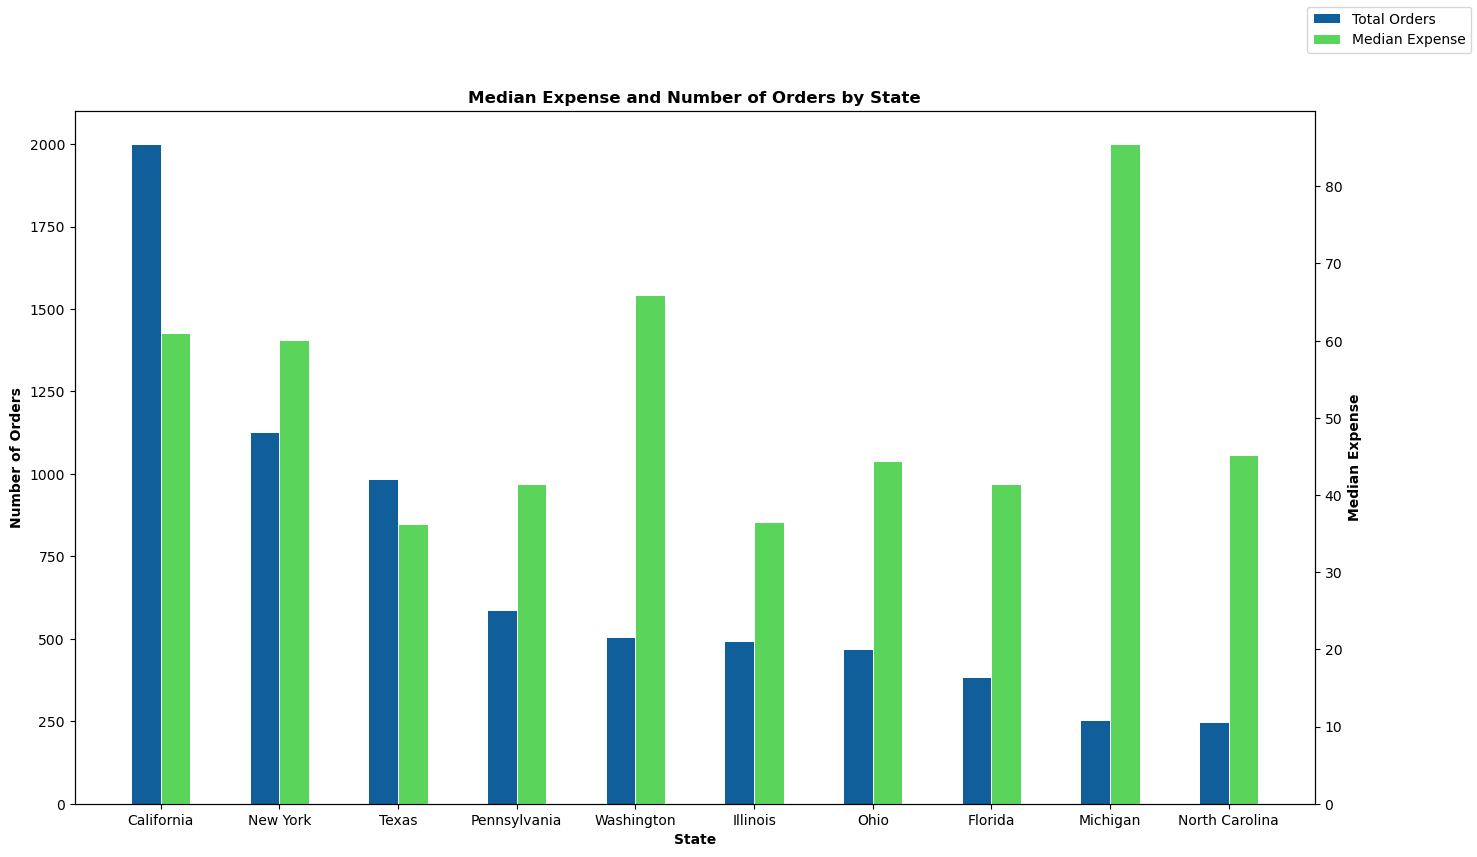

In [28]:
medianExpenseGB = superstoreDF.groupby("State", as_index=False)["Sales"].median()
numberOfOrdersGB = superstoreDF.groupby("State", as_index=False)["Sales"].count()

MExpenseNOrdersDF = pd.merge(medianExpenseGB, numberOfOrdersGB, on="State")
MExpenseNOrdersDF = MExpenseNOrdersDF.rename(columns={'Sales_x': 'MedianExpense', "Sales_y": "NOrders"}) #Median Expense and Number of Orders
MExpenseNOrdersDF = MExpenseNOrdersDF.sort_values(by="NOrders", ascending=False)

MExpenseNOrdersDF = MExpenseNOrdersDF.head(10) #Keeping only the first ten states that have the highest median expense for an order

print(MExpenseNOrdersDF)

barWidth = 0.25
barPositions = range(len(MExpenseNOrdersDF))

fig, ax0 = plt.subplots(figsize=(16, 9))

ax0.set_title("Median Expense and Number of Orders by State", fontdict=dict(weight="bold"))

ax0.bar(x=[pos - barWidth/2 for pos in barPositions], height=MExpenseNOrdersDF["NOrders"], label="Total Orders", width=0.25, edgecolor="white", linewidth=0.7, color="#115f9a")

ax0.set_xlabel("State", fontdict=dict(weight="bold"))
ax0.set_ylabel("Number of Orders", fontdict=dict(weight="bold"))
ax0.set_xticks(barPositions)
ax0.set_xticklabels(MExpenseNOrdersDF["State"])
ax0.tick_params(axis='y')

ax1 = ax0.twinx()

ax1.bar(x=[pos + barWidth/2 for pos in barPositions], height=MExpenseNOrdersDF["MedianExpense"], label="Median Expense", width=0.25, edgecolor="white", linewidth=0.7, color="#5ad45a")
ax1.set_ylabel("Median Expense", fontdict=dict(weight="bold"))
ax1.tick_params(axis='y')

fig.legend(loc="upper right", prop=dict(size="medium"))

plt.savefig(f"./{plotsPath}/OrdersMedianExpensePlot.png", dpi=300)

plt.show()


### Total Orders by Month

9926
   MonthNames  MOrders
0     January      370
1    February      301
2       March      680
3       April      656
4         May      741
5        June      703
6        July      698
7      August      706
8   September     1383
9     October      816
10   November     1456
11   December     1416


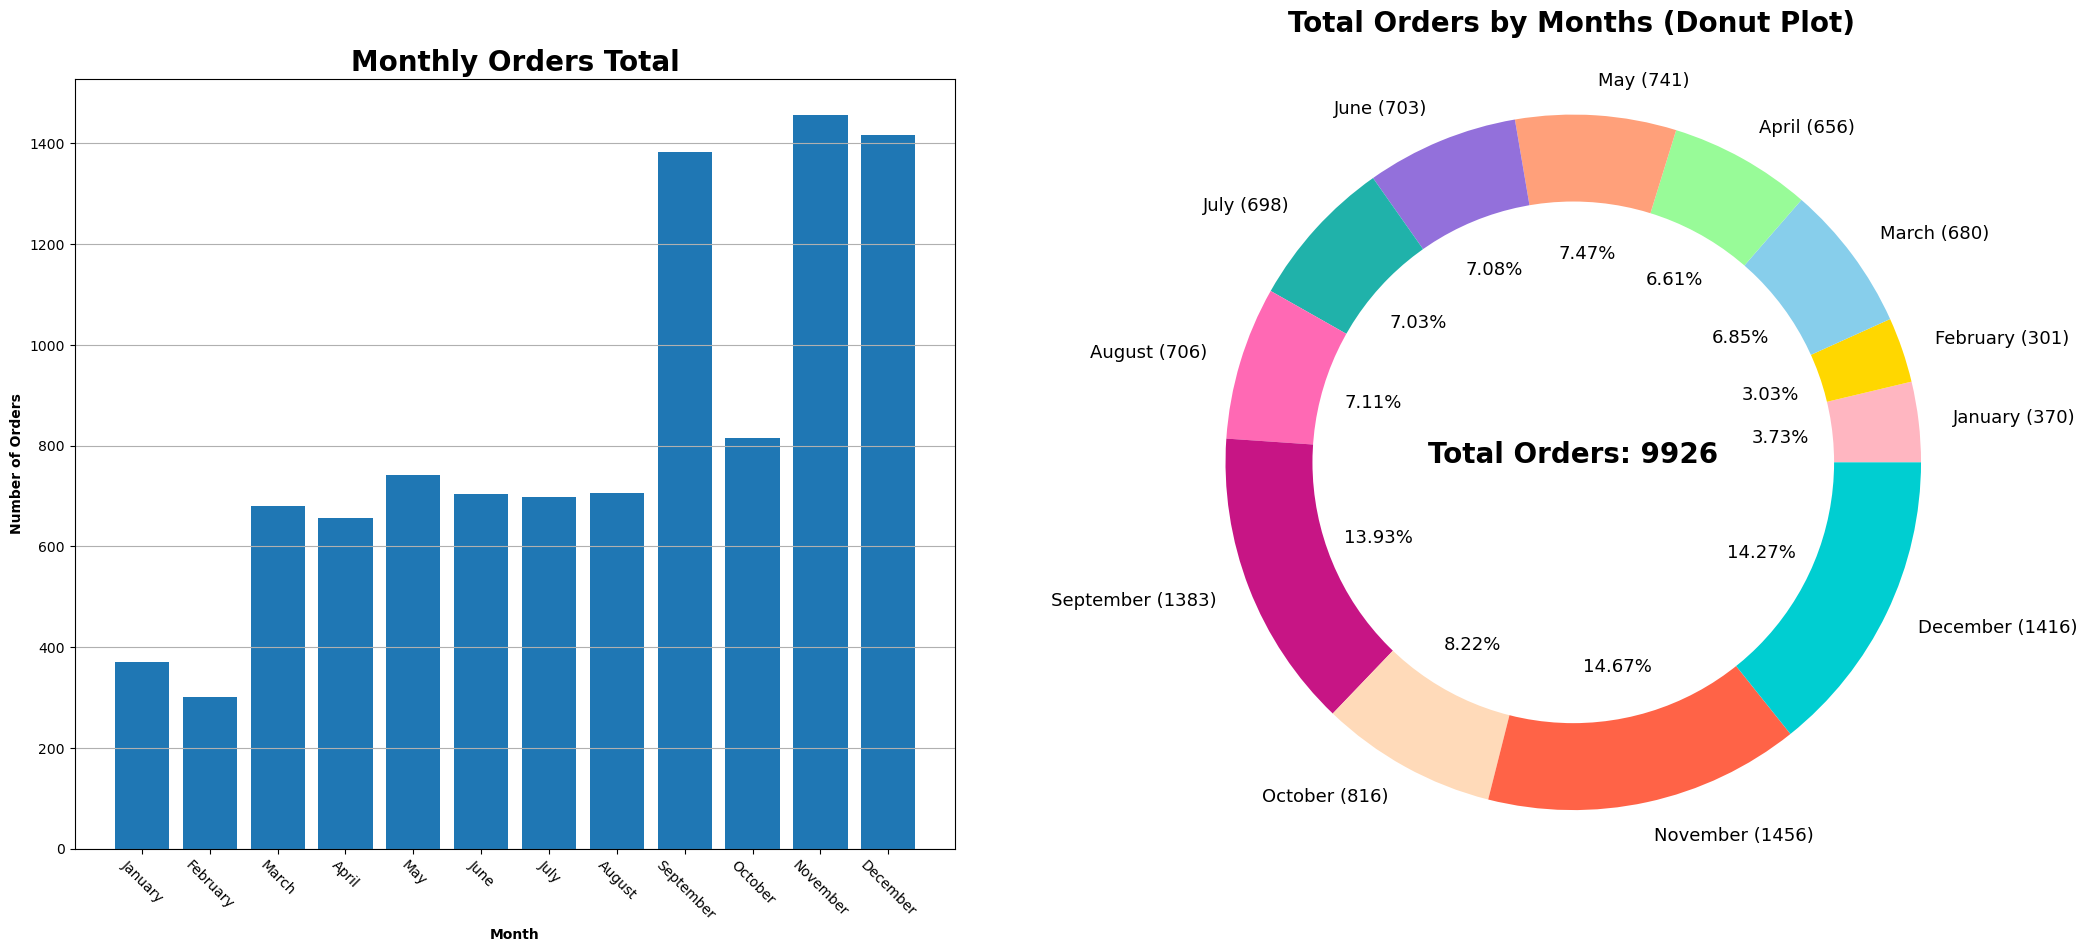

In [29]:
monthlyOrdersDF = superstoreDF.groupby(superstoreDF["OrderDate"].dt.month, as_index=False).count() #Monthly Orders DF

monthlyOrdersDF = monthlyOrdersDF.rename(columns = {"OrderDate":"MOrders"}) #MonthlyOrders
monthNames = [calendar.month_name[i] for i in range(1, 13)]
monthlyOrdersDF["MonthNames"] = monthNames
print(monthlyOrdersDF["MOrders"].sum())

monthlyOrdersDF = monthlyOrdersDF[['MonthNames', "MOrders"]]
print(monthlyOrdersDF)

colorScale = [
'#FFB6C1',  # LightPink
'#FFD700',  # Gold
'#87CEEB',  # SkyBlue
'#98FB98',  # PaleGreen
'#FFA07A',  # LightSalmon
'#9370DB',  # MediumPurple
'#20B2AA',  # LightSeaGreen
'#FF69B4',  # HotPink
'#C71585',  # MediumVioletRed
'#FFDAB9',  # PeachPuff
'#FF6347',  # Tomato
'#00CED1'   # DarkTurquoise
]

plt.figure(figsize=(25,10))

plt.subplot(1,2,1)

plt.bar(x=monthNames, height=monthlyOrdersDF["MOrders"])

plt.grid(axis = "y")

plt.xticks(monthNames, rotation=-45)
plt.xlabel('Month', fontweight='bold', fontsize=10)
plt.ylabel('Number of Orders', fontweight='bold', fontsize=10)
plt.title('Monthly Orders Total', fontweight='bold', fontsize=20)


plt.subplot(1,2,2)

donutLabels = [f"{i} ({j})" for i, j in zip(monthlyOrdersDF['MonthNames'], monthlyOrdersDF['MOrders'])]
#print(donutLabels)

plt.pie(monthlyOrdersDF['MOrders'], labels=donutLabels, autopct="%.2f%%", textprops=dict(fontsize=13), colors=colorScale)

plt.axis("equal")

circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)

plt.title("Total Orders by Months (Donut Plot)", x=0.5, y=1.05, fontweight='bold', fontsize=20)

plt.annotate(text=f'Total Orders: {monthlyOrdersDF["MOrders"].sum()}', xy=(0,0), ha='center', weight='bold', size=20)

plt.savefig(f"./{plotsPath}/TotalOrdersPerMonths.png", dpi=300)

plt.show()

September, November and December seem to be the three months where customers buy the most, and these are the two main reasons:
- September: Elementary, Mid and High schools toghether with Universities and other little businesses re-open and this makes people buy common items that are used in everyday life like: penciles, pens, notebooks, backpacks, etc.
- November and December: People buy gifts for Christmas and other close celebrations and so tend to buy and spend more

### Profit and Sales by Days

Yearly Profit and Sales
               2011         2012         2013         2014
Profit   49108.4417   59182.5436   80622.1538   90980.4047
Sales   483043.7401  461700.5550  603239.2340  725514.6292

Daily Profit and Sales
               Profit      Sales
2011-01-04     5.5512    16.4480
2011-01-05   -65.9901   288.0600
2011-01-06     4.8840    19.5360
2011-01-07  1358.0524  4407.1000
2011-01-08   -71.9621    87.1580
...               ...        ...
2014-12-27    61.1202   814.5940
2014-12-28   -31.9742   177.6360
2014-12-29   239.5598  1628.9708
2014-12-30   644.4338  2915.5340
2014-12-31   101.5365   713.7900

[1235 rows x 2 columns]


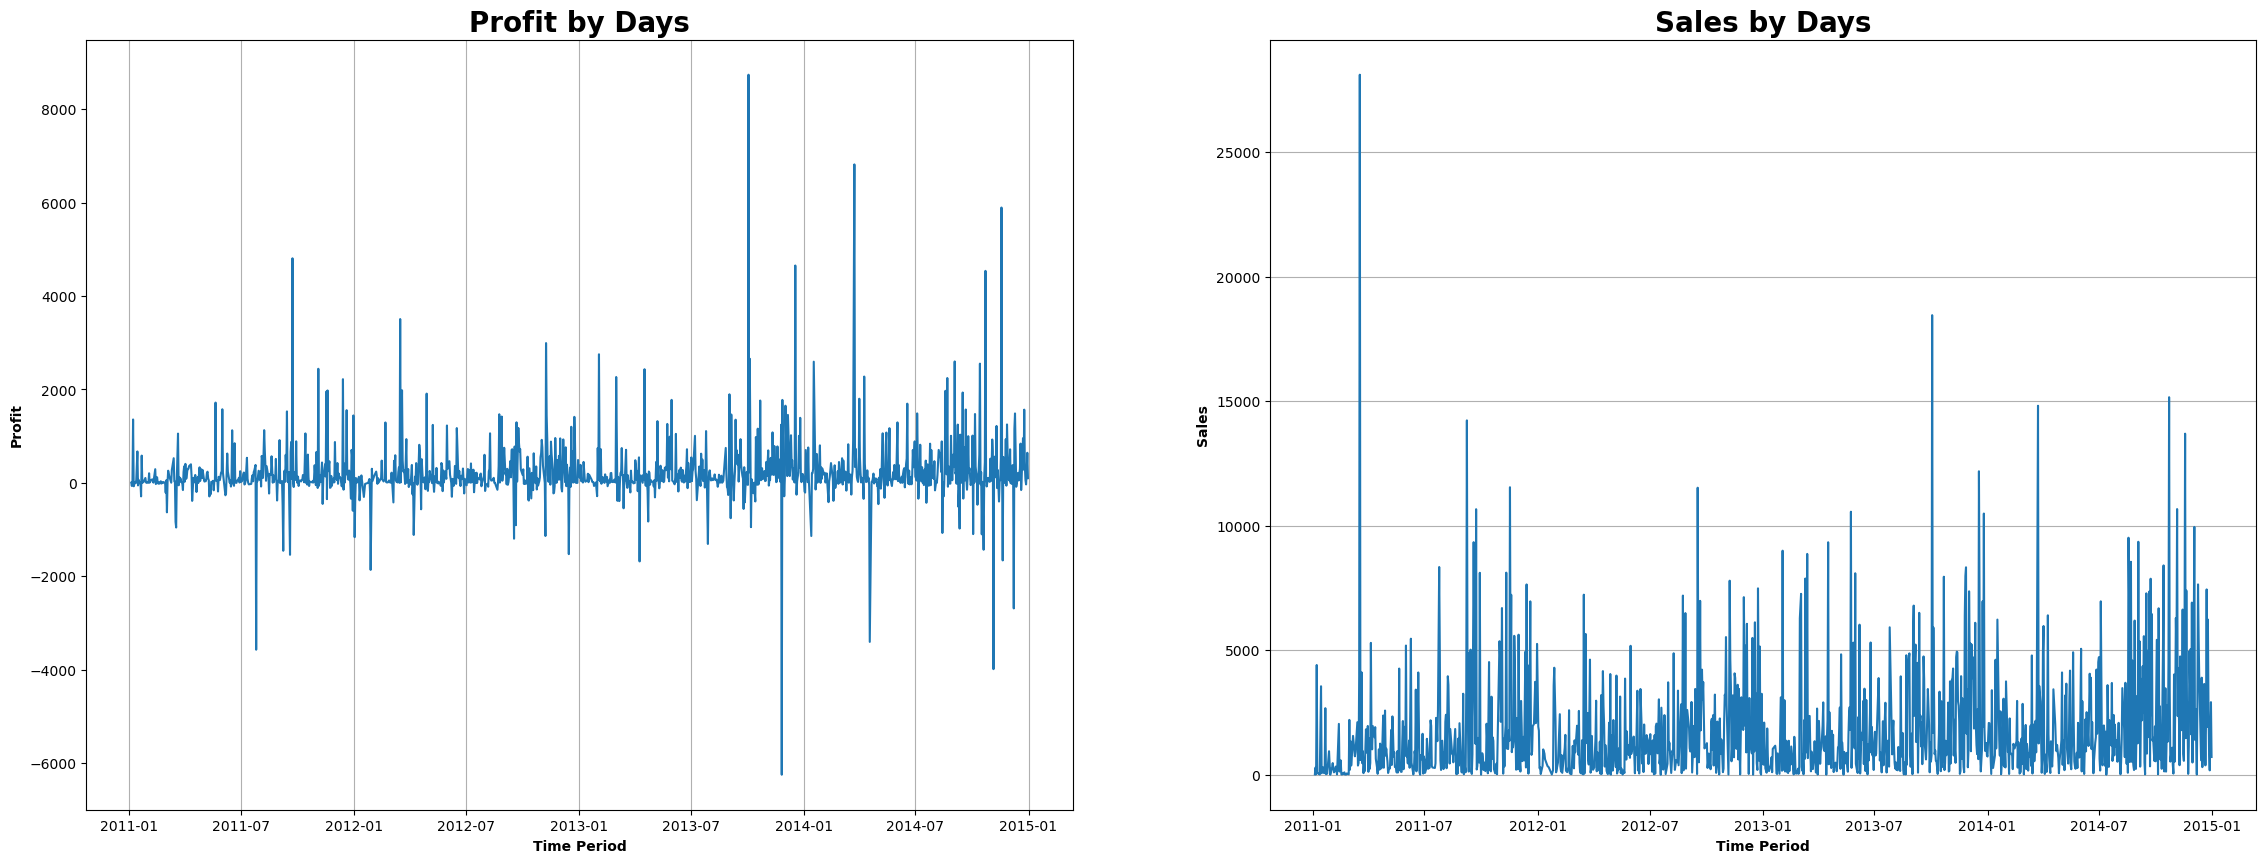

In [30]:

YearlyProfitSalesDF = pd.DataFrame(superstoreDF["Profit"].groupby(superstoreDF["OrderDate"].dt.year).sum())
YearlyProfitSalesDF["Sales"] = pd.DataFrame(superstoreDF["Sales"].groupby(superstoreDF["OrderDate"].dt.year).sum())
YearlyProfitSalesDF.index.name = None

DailyProfitSalesDF = pd.DataFrame(superstoreDF["Profit"].groupby(superstoreDF["OrderDate"]).sum())
DailyProfitSalesDF["Sales"] = pd.DataFrame(superstoreDF["Sales"].groupby(superstoreDF["OrderDate"]).sum())
DailyProfitSalesDF.index.name = None


print("Yearly Profit and Sales")
print(YearlyProfitSalesDF.T)

print("\nDaily Profit and Sales")
print(DailyProfitSalesDF)


plt.figure(figsize=(28,10))

plt.subplot(1,2,1)

plt.grid(axis="x")
plt.plot(DailyProfitSalesDF.index, DailyProfitSalesDF["Profit"])
plt.title("Profit by Days", fontweight='bold', fontsize=20)
plt.xlabel('Time Period', fontweight='bold', fontsize=10)
plt.ylabel('Profit', fontweight='bold', fontsize=10)

plt.subplot(1,2,2)

plt.grid(axis="y")
plt.plot(DailyProfitSalesDF.index, DailyProfitSalesDF["Sales"])
plt.title("Sales by Days", fontweight='bold', fontsize=20)
plt.xlabel('Time Period', fontweight='bold', fontsize=10)
plt.ylabel('Sales', fontweight='bold', fontsize=10)

plt.savefig(f"./{plotsPath}/ProfitByYears.png", dpi=300)

### Median Sale by Segment Bar Plot

count    9801.000000
mean      180.111234
std       303.335931
min         0.444000
25%        17.000000
50%        52.096000
75%       199.836000
max      2079.400000
Name: Sales, dtype: float64
              Sales
Segment            
Consumer     51.870
Corporate    54.552
Home Office  50.120


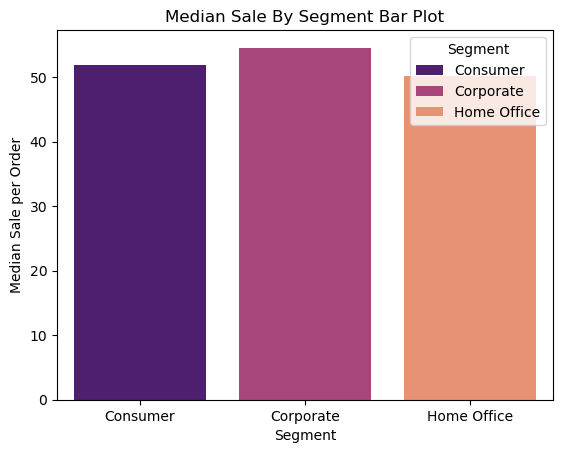

In [31]:
cleanMedianSaleBySegmentDF = ZScore(superstoreDF)

MESDF = pd.DataFrame(cleanMedianSaleBySegmentDF["Sales"].groupby(cleanMedianSaleBySegmentDF["Segment"]).median())
print(MESDF)

bp = sns.barplot(x="Segment", y="Sales", data=MESDF, hue="Segment", palette="magma", legend=True)
bp.set_ylabel("Median Sale per Order")
bp.set(title='Median Sale By Segment Bar Plot')
plt.savefig(f"./{plotsPath}/MedianSaleBySegmentBar.png", dpi=300)


### Shipments Time by Region and Segment

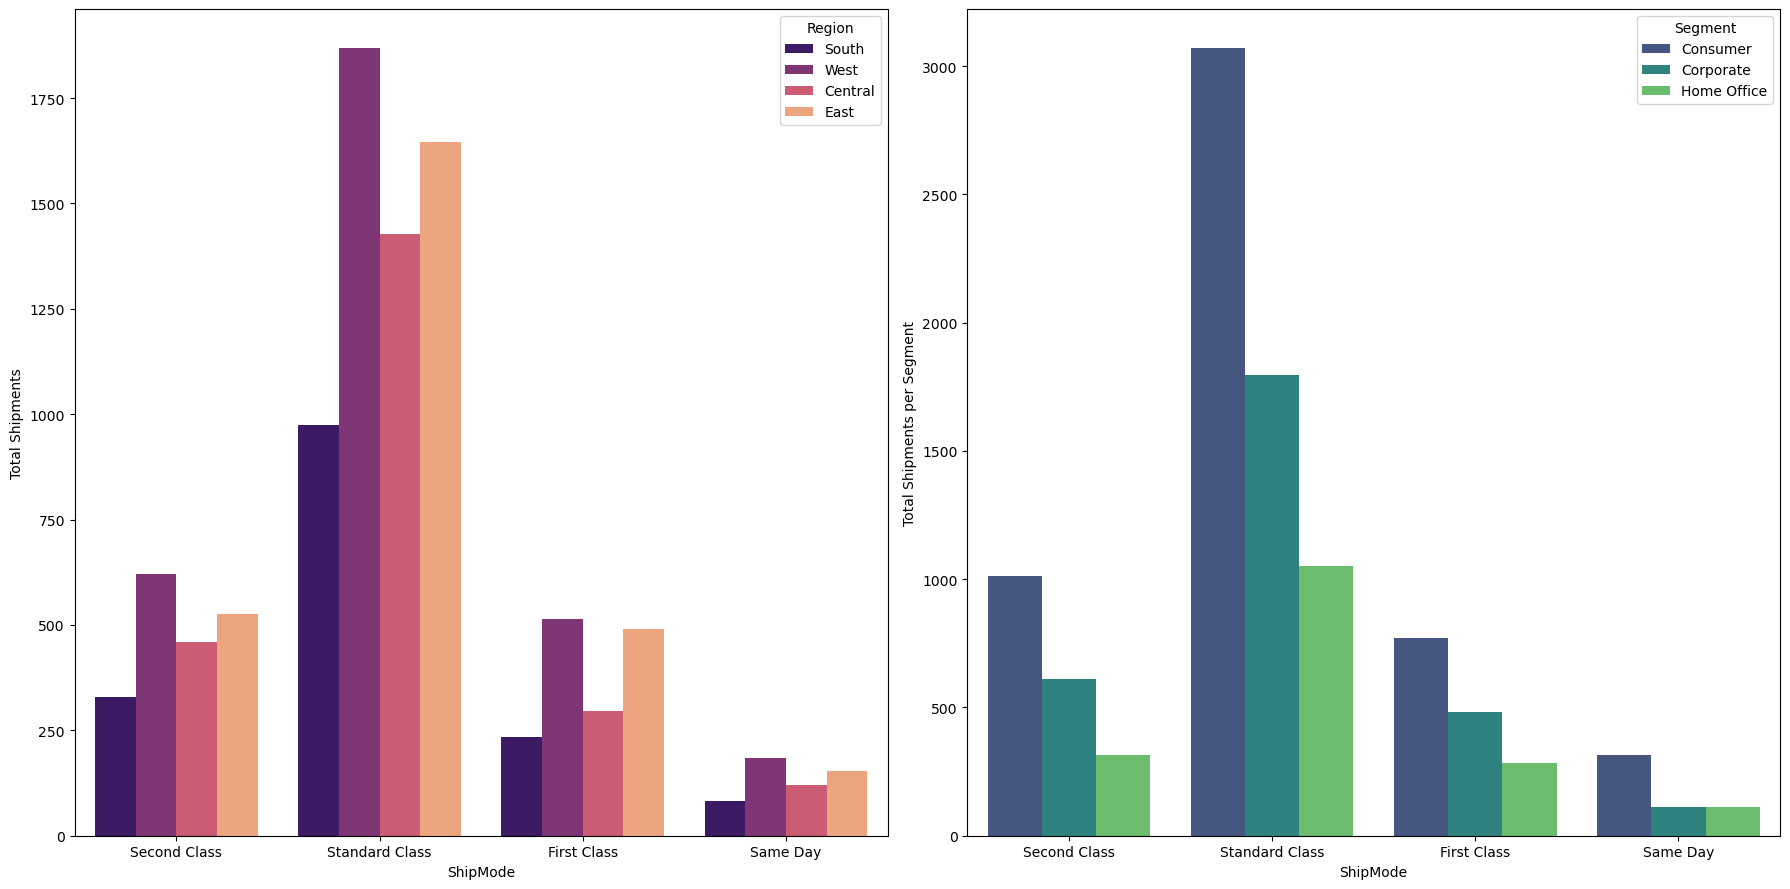

In [32]:
fig, axes = plt.subplots(1,2, figsize=(18, 9))

sns.countplot(superstoreDF, x = "ShipMode", hue = "Region", palette = "magma", ax=axes[0])
axes[0].set_ylabel("Total Shipments")

sns.countplot(superstoreDF, x = "ShipMode", hue = "Segment", palette = "viridis", ax=axes[1])
axes[1].set_ylabel("Total Shipments per Segment")

plt.tight_layout()

plt.savefig(f"./{plotsPath}/ShipmentsInfo.png", dpi=300)

### Correlation Between Sales and Discounts

Correlation between sales and discounts
[[ 1.         -0.02766679]
 [-0.02766679  1.        ]]


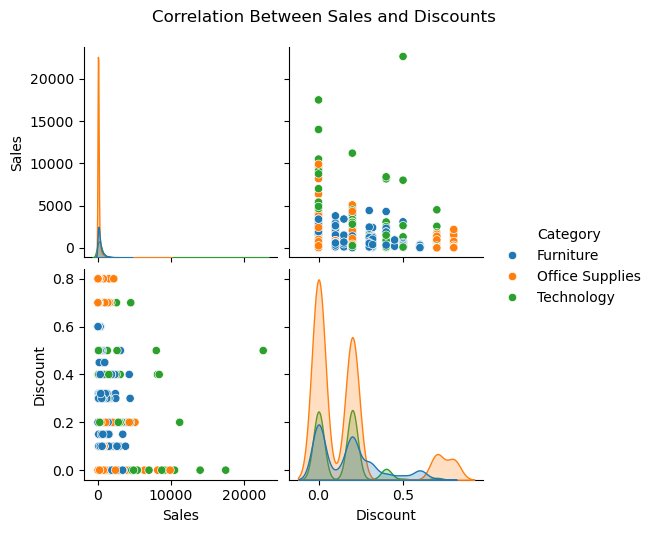

In [33]:
salesDiscountDF = superstoreDF[["Category","Sales","Discount"]]
#print(df)

print("Correlation between sales and discounts")
print(np.corrcoef(salesDiscountDF["Sales"], salesDiscountDF["Discount"])) #Almost no correlation

sd = sns.pairplot(salesDiscountDF, hue="Category")
sd.fig.suptitle(t='Correlation Between Sales and Discounts', y=1.05)
plt.savefig(f"./{plotsPath}/SalesDiscountCorrelationPlot.png", dpi=300)


### Median Profit by Sub Category

Median Profits by Sub Category
                Profit
SubCategory           
Accessories   21.00000
Appliances    17.02680
Art            3.72000
Binders        3.94980
Bookcases      3.67450
Chairs        12.80580
Copiers      329.99400
Envelopes     12.74400
Fasteners      2.84160
Furnishings    9.02880
Labels         6.87140
Machines      38.80370
Paper         11.54320
Phones        23.52480
Storage        7.63650
Supplies       3.69360
Tables       -31.20285

Profit Sums by Sub Category
                 Profit
SubCategory            
Accessories  41481.0852
Appliances   17846.0466
Art           6451.0748
Binders      29930.8511
Bookcases    -4525.4318
Chairs       25966.8468
Copiers      54237.8479
Envelopes     6963.2179
Fasteners      943.3541
Furnishings  12970.2506
Labels        5523.0031
Machines      2736.1945
Paper        33612.3857
Phones       43996.0070
Storage      20605.0673
Supplies     -1195.7295
Tables      -17648.5275


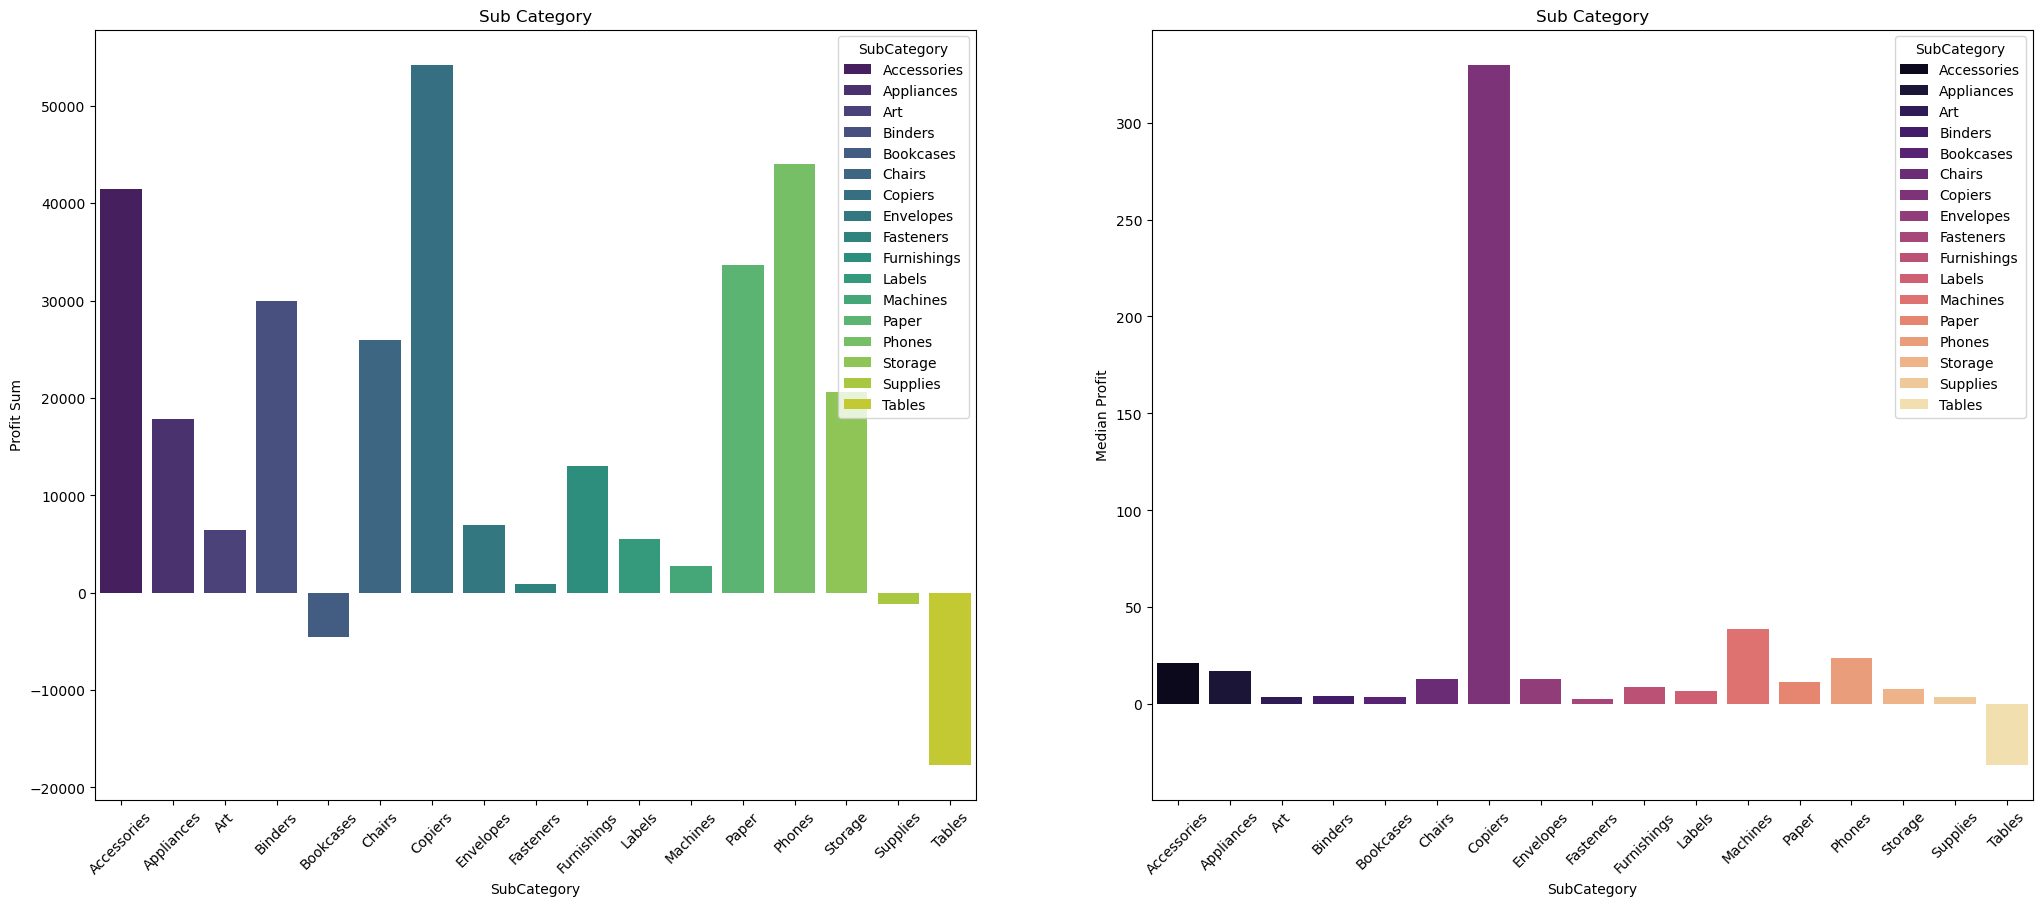

In [34]:
medianProfitsGB = pd.DataFrame(superstoreDF["Profit"].groupby(superstoreDF["SubCategory"]).median())
print("Median Profits by Sub Category")
print(medianProfitsGB)

profitSumsGB = pd.DataFrame(superstoreDF["Profit"].groupby(superstoreDF["SubCategory"]).sum())
print("\nProfit Sums by Sub Category")
print(profitSumsGB)

fig, axes = plt.subplots(1,2, figsize=(25, 10))

ProfitableCategoryPlot = sns.barplot(medianProfitsGB, x="SubCategory", y="Profit", hue="SubCategory", palette="magma", legend=True, ax=axes[1])
ProfitableCategoryPlot.set_ylabel("Median Profit")
ProfitableCategoryPlot.set(title='Sub Category')
ProfitableCategoryPlot.set_xticklabels(labels=medianProfitsGB.index, rotation=45)

ProfitSumsPlot = sns.barplot(profitSumsGB, x = "SubCategory", y = "Profit", hue = "SubCategory", palette = "viridis", legend=True, ax=axes[0])
ProfitSumsPlot.set_ylabel("Profit Sum")
ProfitSumsPlot.set(title='Sub Category')
ProfitSumsPlot.set_xticklabels(labels=profitSumsGB.index, rotation=45)
sns.move_legend(axes[0], "upper right")

plt.savefig(f"./{plotsPath}/ProfitsPerCategories.png", dpi=300)


### Sales Sum by City

In [35]:
superstoreDF.groupby("City", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)

,City,Sales
320,New York City,256368.161
258,Los Angeles,175851.341
442,Seattle,119540.742
428,San Francisco,112669.092
365,Philadelphia,109077.013
...,...,...
345,Ormond Beach,2.808
361,Pensacola,2.214
213,Jupiter,2.064
135,Elyria,1.824


### Profit Sum by Category and Sub-Category

In [36]:
categoryProfitsDF = superstoreDF.groupby("Category", as_index=False)["Profit"].sum().sort_values(by="Profit", ascending=False)
subCategoryProfitsDF = superstoreDF.groupby("SubCategory", as_index=False)["Profit"].sum().sort_values(by="Profit", ascending=False)

print("Profit Sum by Category", "\n", categoryProfitsDF, "\n")
print("Profit Sum by Sub-Category", "\n", subCategoryProfitsDF)

Profit Sum by Category 
           Category       Profit
2       Technology  142451.1346
1  Office Supplies  120679.2711
0        Furniture   16763.1381 

Profit Sum by Sub-Category 
     SubCategory      Profit
6       Copiers  54237.8479
13       Phones  43996.0070
0   Accessories  41481.0852
12        Paper  33612.3857
3       Binders  29930.8511
5        Chairs  25966.8468
14      Storage  20605.0673
1    Appliances  17846.0466
9   Furnishings  12970.2506
7     Envelopes   6963.2179
2           Art   6451.0748
10       Labels   5523.0031
11     Machines   2736.1945
8     Fasteners    943.3541
15     Supplies  -1195.7295
4     Bookcases  -4525.4318
16       Tables -17648.5275


In [37]:

categorySalesDF = superstoreDF.groupby("Category", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
subCategorySalesDF = superstoreDF.groupby("SubCategory", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)

print("Profit Sum by Category", "\n", categorySalesDF, "\n")
print("Profit Sum by Sub-Category", "\n", subCategorySalesDF)

Profit Sum by Category 
           Category        Sales
2       Technology  828357.2290
0        Furniture  732758.2753
1  Office Supplies  712382.6540 

Profit Sum by Sub-Category 
     SubCategory        Sales
13       Phones  327828.9100
5        Chairs  324680.2970
14      Storage  220270.1080
16       Tables  206292.1880
3       Binders  202633.5750
11     Machines  187858.7110
0   Accessories  166141.5280
6       Copiers  146528.0800
4     Bookcases  110333.1363
1    Appliances  106470.9410
9   Furnishings   91452.6540
12        Paper   77566.2060
15     Supplies   46648.0380
2           Art   26872.2520
7     Envelopes   16474.3620
10       Labels   12436.8420
8     Fasteners    3010.3300
